In [16]:
#load and perform basic data exploration over Mnist dataset ; https://www.kaggle.com/c/digit-recognizer/data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data=pd.read_csv('/Users/princebharti/Desktop/dataset/mnist_train.csv')

In [16]:
type(data)

pandas.core.frame.DataFrame

In [17]:
data.shape # shape of df

(42000, 785)

In [18]:
data.head() # show first 5 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
label=data['label'] # save the label of the data into the variable label

In [20]:
data=data.drop('label',axis=1)

In [21]:
data.shape

(42000, 784)

label for the choosen index is  3


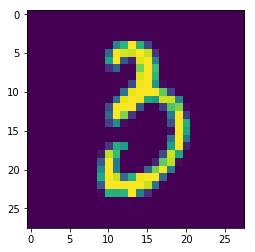

In [22]:
#display one of the data point
idx=150
grid_data=data.iloc[idx].as_matrix().reshape((28,28))
plt.imshow(grid_data)
print('label for the choosen index is ',label[idx])

visualisation using PCA

In [24]:
data_sample=data[:1500]  # taking only few samples from data of 42k
label_sample=data[:1500]

In [32]:
# now we should preprocess the data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [47]:
x=scalar.fit_transform(data_sample) # x is a data matrix

In [49]:
n,m=x.shape

In [ ]:
s=np.transpose(x)

In [53]:
a=np.arange(10)

In [54]:
b=np.arange(10)

In [66]:
np.dot(2,b)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [67]:
np.matmul(2,b)

ValueError: Scalar operands are not allowed, use '*' instead

In [65]:
np.dot(np.transpose(x),x)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])